In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
import random
import plotly.express as px



In [74]:
# url = 'https://public.boxcloud.com/d/1/b1!B8sf6kkG8-aqR_PLMGVu_50cFD7w5eI7bt1IB1TONKZAAdGLnr7yuf8QrZ0ETQy1kLyjDwLSFwDNzTxzvWXQNQUD171No9Q0PujYK8zngeRasolS5xFo_c3prCjregDTWBOk4oR46Y0xxtpxqecrWfg-9Hns-K-p_7mb7B0zYTA0-ooY9ECSWzcMWLuZD8uTy3umXKCHo4qe7P63ckGtJkERNAqnEW64UrjPOwEHwC73NwjiqTdVq4dwMJrQXaeuEtAo2-B18hW41dzbcaXB2O_ftngACrXjqLXm64xJg2aElPD9baJoeC2deGrMwtP3HduQHbMvsiKRYBdnPG0KukW02eVdvOIeBzcMiEUKfjT_7HSexMp-BMsdRHEORFuXC6Rx3qIwlvQLLDNT6z1NUB3O2MM21EnmC1IwC36ARsXl0JYVAl_Ffcol7WZA2AOe-vigoKAuZsj6DjAN3gYnnqnrMgw2sD_ZDMiw1T4rNB86l_-FQXp67v1CRpoEwfQly69ksFqIXWaPpEwvMXql9p_DpKtRHp1qlHjf2oAE1qr-Wbm5ujtPOxfMjGaOgGUTatEAoYiU4QynnIb0SdrIeSzVP5xve6zfs0rG2v_FTLQQRepwIpFjhH8uClaG3393YvGgzsfg7frkP9SpcaugcYPOLBMeHNGwpbO9oxCLag8_-RsJkikUiKQhl4jvmItPjvfXlUwTJ0f97Fd0hX5OJt8uciv283pUaClYGMPBcROfT_KkB5hZ_c8RKslzN91WmF26sqaz1qWOYuDb9toVQ5LygkS6U9Yu_eflbWfnF8vhKuFGPZWrqWfQCElGB6RQchI46riVcx3cF974gHa-bfZaKVl0K5wcfMCOu0dBwpstIFg2t8Y_dI13IK2t2u7hJdYOQzVDEqRp8Xq5G9grwBeAt2Nw6BjRjOPeSc0KOko8b92EvyLCFiQlS1aL9tpMGPp08jkmSiLUjbJVcWg3d_WEEgI4GCIQ6x_NXG2vxRCWQ7eySCou2d9V096nPiYEOjde6E39rjDC364l1T_cX30EtHtwS7FAbmZ8gee5EKLmCXSQCb-CcDp57t8VpgOzSGJwWT97jhXFCznKj_jAE9y9kPY1afIu-zbDR-Q69Ka8BEH4k218l-umeBXxo6ndY7kc0lXOW9xRSsad7O5ijgkV3XKvU7-VnRekJJ4H7IOTLHM_ETeTImn6CfAtWgzKAMmsPjGzBskbdVN3j9q3X6dncw4XkKYMtUpZenH-qbfUlgFScbDp-5DZ91YmzU6eSi_Fq7D-Rl-O1IKHLddsjiaGbFl6230HIsPE19oV/download'

# response = requests.get(url)
# csv_content = response.content.decode('utf-8')
# csv_file = StringIO(csv_content)

filename = '311-2016-2018.csv'

n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 500000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list

df = pd.read_csv(filename, skiprows=skip, on_bad_lines='skip')
df['Date'] = pd.to_datetime(df['Created Date']).dt.date
df


/var/folders/1q/kqvp77k931q_0cj81wm8j_zm0000gp/T/ipykernel_6411/1513773662.py:13: DtypeWarning:

Columns (8,17,31) have mixed types. Specify dtype option on import or set low_memory=False.



,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Created Year,Date
0,38237865,01/17/2018 11:21:02 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,Sewage Odor,3+ Family Apt. Building,10463.0,150 WEST 225 STREET,...,NaN,NaN,NaN,NaN,NaN,40.875121,-73.912461,"(40.87512093148135, -73.91246144190357)",2018,2018-01-17
1,38237917,01/17/2018 06:29:49 AM,01/17/2018 10:44:05 PM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11236.0,1565 REMSEN AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.633108,-73.898022,"(40.633107575503836, -73.89802167438894)",2018,2018-01-17
2,38237937,01/16/2018 11:01:11 PM,01/23/2018 12:00:00 AM,DOB,Department of Buildings,Building/Use,Illegal Conversion Of Residential Building/Space,NaN,11209.0,237 79 STREET,...,NaN,NaN,NaN,NaN,NaN,40.628949,-74.030561,"(40.628949210247846, -74.03056096297946)",2018,2018-01-16
3,38237940,01/17/2018 08:58:48 AM,01/17/2018 11:59:12 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11421.0,88-40 80 STREET,...,NaN,NaN,NaN,NaN,NaN,40.689200,-73.861477,"(40.68920016220445, -73.86147692181669)",2018,2018-01-17
4,38238012,01/17/2018 04:06:00 PM,01/24/2018 02:15:00 PM,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,11224.0,3415 NEPTUNE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.578029,-74.003218,"(40.57802902030597, -74.00321828018173)",2018,2018-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,38237777,01/17/2018 01:06:00 PM,NaN,DEP,Department of Environmental Protection,Water System,Hydrant Leaking (WC1),NaN,11208.0,570 JAMAICA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.685115,-73.882715,"(40.68511484223842, -73.88271548046248)",2018,2018-01-17
499995,38237780,01/16/2018 01:49:00 PM,01/17/2018 12:00:00 PM,DSNY,A - Brooklyn,Snow,E9 Snow / Icy Sidewalk,Sidewalk,11221.0,1079 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.692454,-73.929019,"(40.69245381121872, -73.92901862529011)",2018,2018-01-16
499996,38237787,01/17/2018 02:55:00 PM,01/17/2018 03:00:00 PM,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,11238.0,502 LINCOLN PLACE,...,NaN,NaN,NaN,NaN,NaN,40.671965,-73.959747,"(40.67196520922084, -73.95974728227391)",2018,2018-01-17
499997,38237799,01/16/2018 06:04:00 PM,01/18/2018 12:00:00 PM,DSNY,BCC - Brooklyn North,Sanitation Condition,15 Street Cond/Dump-Out/Drop-Off,Street,11221.0,59 STOCKHOLM STREET,...,NaN,NaN,NaN,NaN,NaN,40.696500,-73.925740,"(40.69650027686108, -73.9257398295732)",2018,2018-01-16


In [94]:
df.sample(n=100000).to_csv('requests_311_subset.csv')

In [75]:
df_lat_long = df.copy()

df_lat_long['Latitude'] = np.round(df_lat_long['Latitude'],2)
df_lat_long['Longitude'] = np.round(df_lat_long['Longitude'],2)

df_lat_long_agg = df_lat_long.groupby(['Latitude','Longitude']).size().reset_index(name='counts')
df_lat_long_agg['Density'] = df_lat_long_agg['counts']/df_lat_long_agg['counts'].sum()

color_scale = [(0, 'orange'), (1,'red')]

fig = px.density_mapbox(df_lat_long_agg, 
                        lat="Latitude", 
                        lon="Longitude", 
                        z="Density",
                        color_continuous_scale='viridis',
                        zoom=9, 
                        radius=26,
                        height=800,
                        width=900)

fig.update_layout(mapbox_style="open-street-map")
fig.show()



In [76]:
pd.to_datetime(df['Created Date']).dt.date

0         2018-01-17
1         2018-01-17
2         2018-01-16
3         2018-01-17
4         2018-01-17
             ...    
499994    2018-01-17
499995    2018-01-16
499996    2018-01-17
499997    2018-01-16
499998    2018-01-17
Name: Created Date, Length: 499999, dtype: object

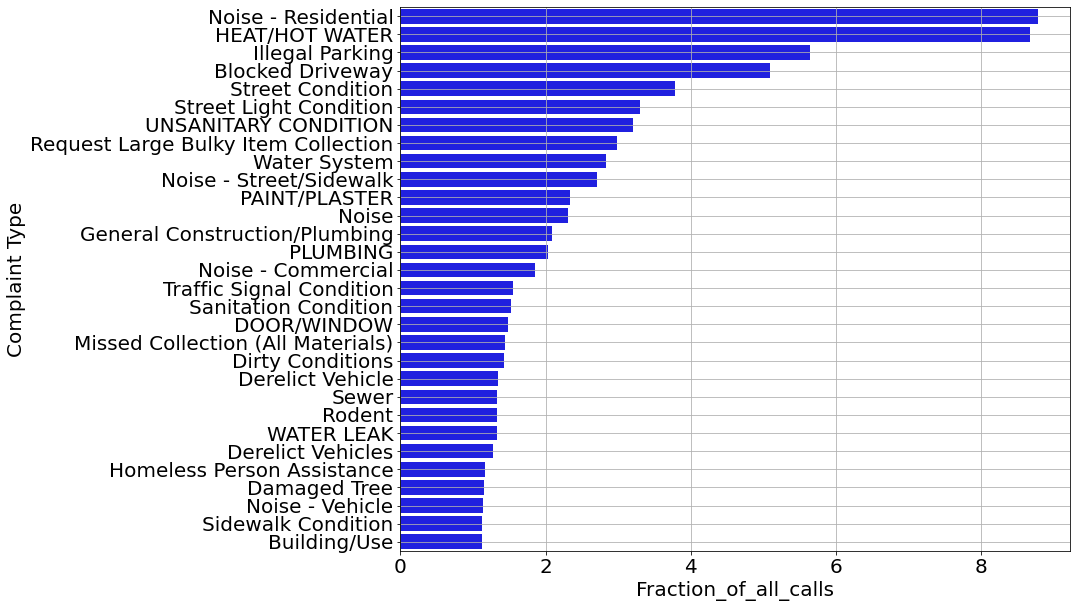

In [77]:
plt.rcParams.update({'font.size': 20})
                           
complaint_frequency = np.round(100*df[['Complaint Type']].value_counts().head(30)/len(df),2).reset_index(name='Fraction_of_all_calls')

fig, ax = plt.subplots(figsize=(12,10))

sns.barplot(data=complaint_frequency, y="Complaint Type", x="Fraction_of_all_calls", 
            color='b', ax=ax, orient="h")
# plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid()



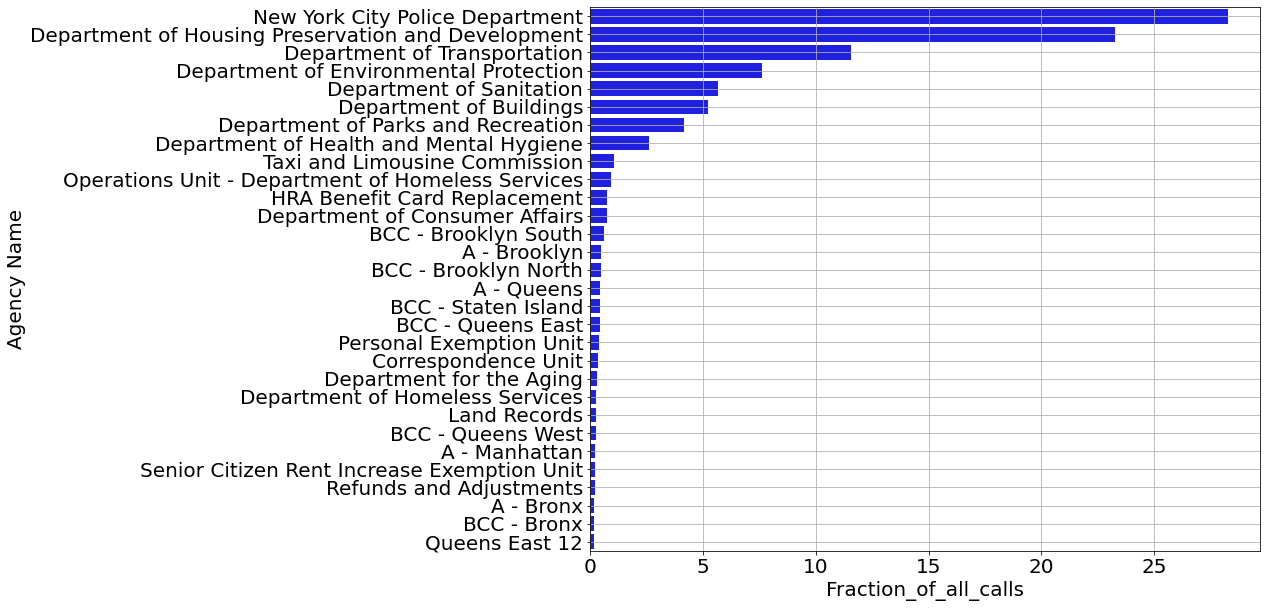

In [78]:
agency_frequency = df["Agency Name"].value_counts()[0:30].reset_index(name='Frequency')
                           
agency_frequency = np.round(100*df[['Agency Name']].value_counts().head(30)/len(df),2).reset_index(name='Fraction_of_all_calls')


fig, ax = plt.subplots(figsize=(12,10))

sns.barplot(data=agency_frequency, y="Agency Name", x="Fraction_of_all_calls", 
            color='b', ax=ax, orient="h")
# plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid()


In [79]:
complaint_frequencies = df.groupby(['Date','Complaint Type']).size().reset_index(name='Frequency')
complaint_frequencies


,Date,Complaint Type,Frequency
0,2016-01-01,APPLIANCE,2
1,2016-01-01,Animal Abuse,2
2,2016-01-01,Benefit Card Replacement,1
3,2016-01-01,Blocked Driveway,18
4,2016-01-01,Building/Use,1
...,...,...,...
81537,2018-12-31,Traffic Signal Condition,11
81538,2018-12-31,UNSANITARY CONDITION,13
81539,2018-12-31,Vending,1
81540,2018-12-31,WATER LEAK,11


In [80]:
df.groupby(['Date']).size().reset_index(name='Frequency')

,Date,Frequency
0,2016-01-01,267
1,2016-01-02,323
2,2016-01-03,306
3,2016-01-04,614
4,2016-01-05,787
...,...,...
1091,2018-12-27,445
1092,2018-12-28,461
1093,2018-12-29,328
1094,2018-12-30,314


/var/folders/1q/kqvp77k931q_0cj81wm8j_zm0000gp/T/ipykernel_6411/8012258.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



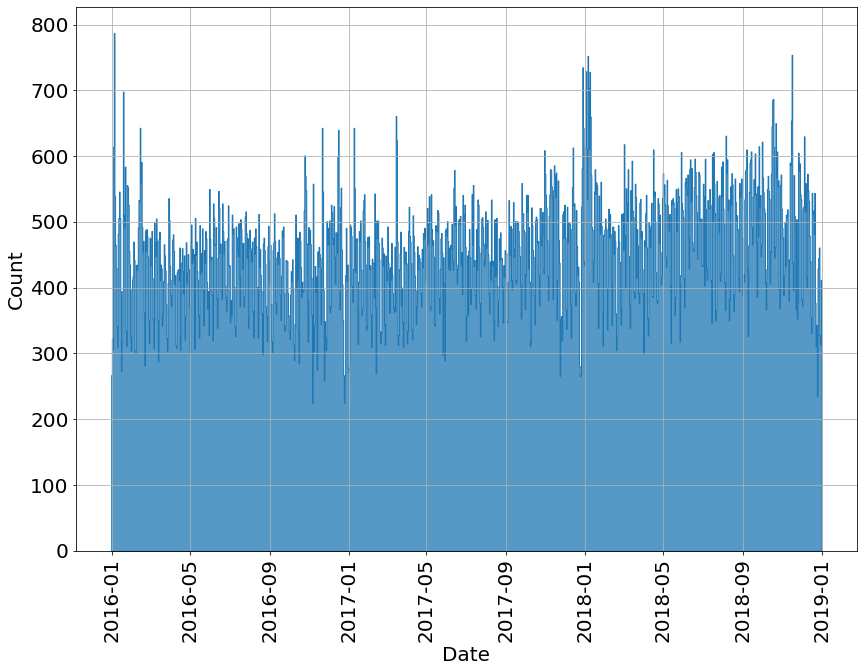

In [81]:
fig, ax = plt.subplots(figsize=(14,10))

sns.histplot(data=df.groupby(['Date']).size().reset_index(name='Frequency'), x="Date", weights="Frequency", 
            palette='Set1', ax=ax, element='step', bins=100)
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid()




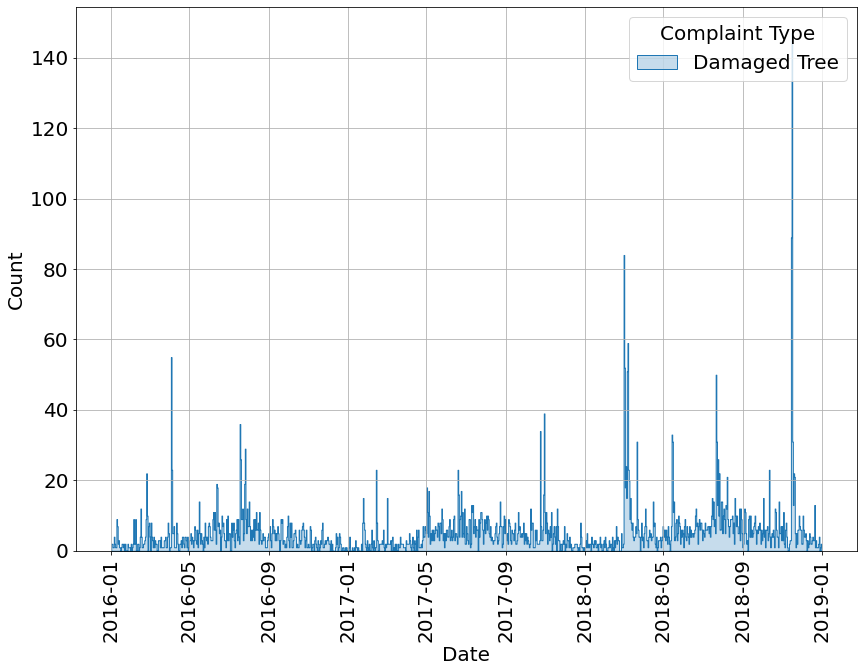

In [82]:
noise = complaint_frequencies.loc[complaint_frequencies['Complaint Type'] == 'Damaged Tree']
                           
fig, ax = plt.subplots(figsize=(14,10))

sns.histplot(data=noise, x="Date", weights="Frequency", hue='Complaint Type',
            color='b', ax=ax, element='step', bins=100, )
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid()


In [84]:
dot = complaint_frequencies.loc[complaint_frequencies['Agency Type'] == 'Deparmen']
                           
fig, ax = plt.subplots(figsize=(14,10))

sns.histplot(data=noise, x="Date", weights="Frequency", hue='Complaint Type',
            color='b', ax=ax, element='step', bins=100, )
plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid()


KeyError: 'Agency Type'

In [91]:
weather_data = pd.read_csv('weather_NY_2010_2018Nov.csv')
weather_data


weather_data['dt'] = pd.to_datetime(weather_data.Year.astype(str) + '/' + weather_data.Month.astype(str) + '/' + weather_data.Day.astype(str))

weather_data.sort_values(by='dt')


,USAF,WBAN,StationName,State,Latitude,Longitude,MeanTemp,MinTemp,MaxTemp,DewPoint,...,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce,Year,Month,Day,dt
0,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,27.6,24.8,30.9,25.0,...,1.3,6.0,NaN,0,NaN,1,2010,1,1,2010-01-01
49973,725290,14768,GREATER ROCHESTER INTERNATIONAL AP,NY,43.117,-77.677,32.0,24.8,34.0,28.9,...,6.4,18.1,22.9,1,1.2,1,2010,1,1,2010-01-01
46735,725150,4725,GREATER BINGHAMTON/E A LINK FIELD AP,NY,42.207,-75.980,28.9,24.8,33.8,26.8,...,5.1,12.0,19.0,0,1.2,1,2010,1,1,2010-01-01
43511,744865,14719,FRANCIS S GABRESKI AP,NY,40.844,-72.632,33.5,28.9,35.1,30.0,...,2.0,6.0,NaN,1,NaN,1,2010,1,1,2010-01-01
133041,744994,4741,SCHENECTADY COUNTY AIRPORT,NY,42.850,-73.950,31.4,26.6,35.6,29.0,...,6.2,18.1,21.0,0,NaN,1,2010,1,1,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157287,725037,94745,WESTCHESTER COUNTY AIRPORT,NY,41.067,-73.708,31.6,28.0,35.1,22.1,...,1.9,5.1,NaN,0,NaN,0,2018,11,12,2018-11-12
2982,726228,94740,ADIRONDACK REGIONAL ARPT,NY,44.385,-74.207,19.0,14.0,24.1,NaN,...,0.7,2.9,NaN,0,NaN,0,2018,11,12,2018-11-12
81310,726223,94725,MASSENA INTL/RCHARDS FD AP,NY,44.936,-74.846,23.7,21.0,26.1,20.3,...,0.4,2.9,NaN,0,NaN,0,2018,11,12,2018-11-12
90280,725014,54780,MONTAUK AIRPORT,NY,41.073,-71.923,40.6,36.0,43.0,25.0,...,6.7,11.1,NaN,0,NaN,0,2018,11,12,2018-11-12


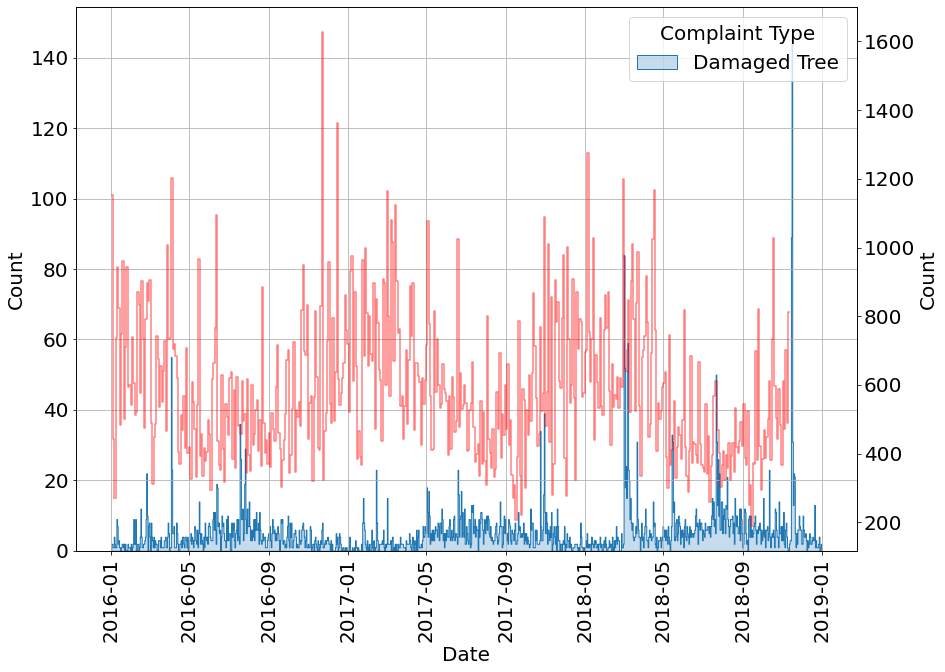

In [87]:
noise = complaint_frequencies.loc[complaint_frequencies['Complaint Type'] == 'Damaged Tree']
                           
fig, ax = plt.subplots(figsize=(14,10))

sns.histplot(data=noise, x="Date", weights="Frequency", hue='Complaint Type',
            color='b', ax=ax, element='step', bins=100, )

ax2 = ax.twinx()

sns.histplot(data=weather_data.loc[weather_data['dt'] > pd.to_datetime('2016-01-01')], 
             x="dt", weights="WindSpeed", fill=False,
            color='r', ax=ax2, element='step', bins=500, alpha =0.5)
# sns.barplot(data=weather_data.loc[weather_data['dt'] > pd.to_datetime('2016-01-01')], x="dt", y='Percipitation', color='g', ax=ax2 )

plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
ax.grid()



In [89]:
df['Date'] = pd.to_datetime(df['Date'])

In [90]:
df.merge(weather_data, left_on='Date', right_on='dt')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,WindSpeed,MaxSustainedWind,Gust,Rain,SnowDepth,SnowIce,Year,Month,Day,dt
0,38237865,01/17/2018 11:21:02 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,Sewage Odor,3+ Family Apt. Building,10463.0,150 WEST 225 STREET,...,2.3,8.0,NaN,0,NaN,1,2018,1,17,2018-01-17
1,38237865,01/17/2018 11:21:02 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,Sewage Odor,3+ Family Apt. Building,10463.0,150 WEST 225 STREET,...,5.4,13.0,17.1,0,5.9,1,2018,1,17,2018-01-17
2,38237865,01/17/2018 11:21:02 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,Sewage Odor,3+ Family Apt. Building,10463.0,150 WEST 225 STREET,...,0.0,NaN,NaN,0,NaN,0,2018,1,17,2018-01-17
3,38237865,01/17/2018 11:21:02 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,Sewage Odor,3+ Family Apt. Building,10463.0,150 WEST 225 STREET,...,3.8,9.9,NaN,1,NaN,1,2018,1,17,2018-01-17
4,38237865,01/17/2018 11:21:02 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Indoor Sewage,Sewage Odor,3+ Family Apt. Building,10463.0,150 WEST 225 STREET,...,13.6,20.0,28.0,0,9.1,1,2018,1,17,2018-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23255785,37394043,10/05/2017 11:12:23 AM,10/06/2017 11:30:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10467.0,NaN,...,7.2,17.1,26.0,1,NaN,0,2017,10,5,2017-10-05
23255786,37394043,10/05/2017 11:12:23 AM,10/06/2017 11:30:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10467.0,NaN,...,0.0,NaN,NaN,0,NaN,0,2017,10,5,2017-10-05
23255787,37394043,10/05/2017 11:12:23 AM,10/06/2017 11:30:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10467.0,NaN,...,6.7,18.1,28.9,1,NaN,0,2017,10,5,2017-10-05
23255788,37394043,10/05/2017 11:12:23 AM,10/06/2017 11:30:00 AM,DOT,Department of Transportation,Street Condition,Pothole,NaN,10467.0,NaN,...,3.6,8.9,NaN,0,NaN,0,2017,10,5,2017-10-05


In [67]:
import polars as pl
df_pl = pl.read_csv(filename, n_rows=1000000)  
df_pl



Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Created Year
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64
38237851,"""01/17/2018 02:...","""01/24/2018 12:...","""DSNY""","""Department of ...","""Request Large ...","""Request Large ...","""Sidewalk""","""11222""","""95 GREENPOINT ...","""GREENPOINT AVE...","""FRANKLIN STREE...","""MANHATTAN AVEN...","""""","""""","""ADDRESS""","""BROOKLYN""","""""","""N/A""","""Closed""","""""","""""","""01/24/2018 12:...","""01 BROOKLYN""","""3025580072""","""BROOKLYN""","""996371""","""205243""","""PHONE""","""Unspecified""","""BROOKLYN""","""""","""""","""""","""""","""""","""""","""""","""40.73001299919...","""-73.9562665050...","""(40.7300129991...",2018
38237852,"""01/17/2018 01:...","""01/21/2018 12:...","""DSNY""","""Department of ...","""Request Large ...","""Request Large ...","""Sidewalk""","""10308""","""40 ASHWOOD COU...","""ASHWOOD COURT""","""REDWOOD AVENUE...","""DEAD END""","""""","""""","""ADDRESS""","""STATEN ISLAND""","""""","""N/A""","""Closed""","""""","""""","""01/21/2018 12:...","""03 STATEN ISLA...","""5045500032""","""STATEN ISLAND""","""944803""","""142783""","""PHONE""","""Unspecified""","""STATEN ISLAND""","""""","""""","""""","""""","""""","""""","""""","""40.55849438239...","""-74.1419624546...","""(40.5584943823...",2018
38237855,"""01/17/2018 10:...","""01/20/2018 10:...","""DSNY""","""Department of ...","""Request Large ...","""Request Large ...","""Sidewalk""","""11361""","""204-36 47 ROAD...","""47 ROAD""","""DEAD END""","""206 STREET""","""""","""""","""ADDRESS""","""Bayside""","""""","""N/A""","""Closed""","""""","""""","""01/20/2018 10:...","""11 QUEENS""","""4073190116""","""QUEENS""","""1046423""","""214086""","""PHONE""","""Unspecified""","""QUEENS""","""""","""""","""""","""""","""""","""""","""""","""40.75407455058...","""-73.7755937960...","""(40.7540745505...",2018
38237856,"""01/17/2018 07:...","""01/19/2018 12:...","""DSNY""","""Department of ...","""Request Large ...","""Request Large ...","""Sidewalk""","""10467""","""3851 BARNES AV...","""BARNES AVENUE""","""EAST 221 STREE...","""EAST 222 STREE...","""""","""""","""ADDRESS""","""BRONX""","""""","""N/A""","""Closed""","""""","""""","""01/19/2018 12:...","""12 BRONX""","""2046690010""","""BRONX""","""1023208""","""261440""","""PHONE""","""Unspecified""","""BRONX""","""""","""""","""""","""""","""""","""""","""""","""40.88418051177...","""-73.8591105464...","""(40.8841805117...",2018
38237857,"""01/17/2018 07:...","""01/20/2018 07:...","""DSNY""","""Department of ...","""Request Large ...","""Request Large ...","""Sidewalk""","""11215""","""160 7 AVENUE""","""7 AVENUE""","""GARFIELD PLACE...","""1 STREET""","""""","""""","""ADDRESS""","""BROOKLYN""","""""","""N/A""","""Closed""","""""","""""","""01/20/2018 07:...","""06 BROOKLYN""","""3009660042""","""BROOKLYN""","""990563""","""184146""","""PHONE""","""Unspecified""","""BROOKLYN""","""""","""""","""""","""""","""""","""""","""""","""40.67211272839...","""-73.9772419879...","""(40.6721127283...",2018
38237858,"""01/17/2018 06:...","""01/18/2018 10:...","""DSNY""","""Department of ...","""Request Large ...","""Request Large ...","""Sidewalk""","""11201""","""108 BALTIC STR...","""BALTIC STREET""","""COLUMBIA STREE...","""HICKS STREET""","""""","""""","""ADDRESS""","

In [66]:
df_pd = pd.read_csv(filename, nrows=1000000)  
df_pd


/var/folders/1q/kqvp77k931q_0cj81wm8j_zm0000gp/T/ipykernel_6411/841813270.py:1: DtypeWarning:

Columns (8,17,31,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.



,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Created Year
0,38237851,01/17/2018 02:39:00 PM,01/24/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11222,95 GREENPOINT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.730013,-73.956267,"(40.73001299919553, -73.95626650502489)",2018
1,38237852,01/17/2018 01:40:00 PM,01/21/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10308,40 ASHWOOD COURT,...,NaN,NaN,NaN,NaN,NaN,NaN,40.558494,-74.141962,"(40.558494382393974, -74.14196245468202)",2018
2,38237855,01/17/2018 10:42:00 PM,01/20/2018 10:02:00 PM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11361,204-36 47 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.754075,-73.775594,"(40.75407455058778, -73.77559379608053)",2018
3,38237856,01/17/2018 07:26:00 PM,01/19/2018 12:00:00 AM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,10467,3851 BARNES AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.884181,-73.859111,"(40.88418051177941, -73.85911054646147)",2018
4,38237857,01/17/2018 07:13:00 PM,01/20/2018 07:41:00 PM,DSNY,Department of Sanitation,Request Large Bulky Item Collection,Request Large Bulky Item Collection,Sidewalk,11215,160 7 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.672113,-73.977242,"(40.67211272839247, -73.97724198791173)",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,39510893,06/19/2018 08:03:00 PM,06/19/2018 09:00:00 PM,DOT,Department of Transportation,Traffic Signal Condition,Controller,NaN,11210.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.619605,-73.945518,"(40.61960532878832, -73.94551810926144)",2018
999996,39510894,06/19/2018 12:00:00 AM,06/19/2018 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,10451.0,196 EAST 161 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.826431,-73.921288,"(40.82643073691624, -73.92128776514645)",2018
999997,39510895,06/19/2018 11:45:33 AM,07/19/2018 12:52:15 PM,DOE,School - PS 291,School Maintenance,Air Conditioning Problem,School,10453.0,2195 ANDREWS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.858810,-73.909746,"(40.858809848306564, -73.90974630644877)",2018
999998,39510896,06/19/2018 12:36:26 PM,08/19/2018 06:17:21 AM,DOHMH,Department of Health and Mental Hygiene,Food Establishment,Food Spoiled,Restaurant/Bar/Deli/Bakery,11101.0,30-30 47 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.743168,-73.936568,"(40.74316767130191, -73.93656831501343)",2018


In [92]:
jupyter notebook password

SyntaxError: invalid syntax (546852008.py, line 1)